# 1. NL Query Analysis
In the following, we provide multiple descriptive statistics, visualizations and interesting insights of the collected datasets for GUI retrieval. In particular, this section of the notebook shows statistics for the collected queries.

### 1.1 Load Datasets

In [1]:
import pandas as pd
from ast import literal_eval
import numpy as np
import seaborn as sns
sns.set_theme()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)
pd.set_option('display.max_colwidth', 5000)

abs_path = '../data/gui_ranking/goldstandard/'

goldstandard = pd.read_csv(abs_path+"goldstandard.csv")
goldstandard['gui_indexes'] = goldstandard['gui_indexes'].apply(literal_eval)
goldstandard['relevance'] = goldstandard['relevance'].apply(literal_eval)

abs_path = '../data/gui_ranking/mturk/goldstandard_batch_1/02_query_results/'

batch_1 = pd.read_csv(abs_path+"batch_results_1.csv")
batch_2 = pd.read_csv(abs_path+"batch_results_2.csv")
batch_3 = pd.read_csv(abs_path+"batch_results_3.csv")
batch_4 = pd.read_csv(abs_path+"batch_results_4.csv")

batches = pd.concat([batch_1, batch_2, batch_3, batch_4])

In [2]:
goldstandard

,query,gui_indexes,relevance
0,Body care products,"[20162, 53541, 31801, 53543, 2849, 31802, 53548, 63384, 53546, 58748, 28739, 45731, 63387, 28737, 4447, 51773, 35997, 1397, 60568, 42521]","[2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0]"
1,settings and options in a Gym App,"[29156, 39830, 54112, 2274, 2270, 45959, 29162, 45956, 45962, 1010, 33132, 32997, 8252, 29160, 2601, 55121, 2610, 66489, 30328, 18535]","[1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0]"
2,today storms updates,"[1095, 37413, 64157, 52327, 11823, 23714, 59150, 50715, 1090, 71700, 13752, 27988, 58873, 10041, 13984, 54315, 62677, 58881, 70890, 29528]","[0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0]"
3,a survery app with sinup and facebook login option,"[37666, 19704, 20931, 34569, 19707, 15939, 67673, 18535, 7849, 49338, 4305, 57920, 49335, 69548, 41917, 49334, 25374, 49336, 71940, 49332]","[1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0]"
4,down nearby picks,"[31953, 69266, 41693, 31955, 31964, 40197, 61556, 56093, 61554, 48252, 56082, 65194, 22258, 50216, 67203, 69276, 67770, 42641, 68626, 36790]","[2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]"
5,screen with sample movies and information on recording with SnapMovie,"[19996, 20002, 29107, 37885, 65045, 65046, 20000, 71014, 65050, 15199, 18719, 15197, 65053, 65944, 44941, 23149, 44923, 6132, 67071, 20161]","[2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
6,"Filter settings for choosing price range, number of beds and baths","[68029, 63632, 2834, 71793, 71794, 65924, 64988, 65001, 27692, 68027, 50515, 65000, 2839, 71427, 64993, 34423, 64989, 27833, 16889, 3089]","[2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0]"
7,Details about cards and numbers,"[43707, 3813, 3769, 46272, 23855, 31170, 28128, 62634, 22557, 46278, 63748, 28955, 13556, 20802, 50395, 40864, 56935, 28148, 37517, 68164]","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1]"
8,"search bar with shopping categories, discount advertisement and account maintenance","[22741, 35904, 51361, 7334, 22744, 69527, 42815, 8170, 55532, 53884, 64428, 4186, 56464, 10423, 65757, 64303, 33330, 19345, 6911, 64305]","[1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0]"
9,home appliances,"[30791, 68770, 1087, 52944, 9286, 51323, 9281, 17689, 66317, 25966, 66313, 59601, 25962, 66310, 23920, 40668, 58913, 9285, 66314, 13575]","[0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0]"


### 1.2 Analysis of Annotators
We show the distribution of the number of written queries per annotator. Please note that we only consider our filtered query set consisting of 931 NL queries for this computation. In particular, we show standard statistical measures to investigate the distribution of the number of queries written by the annotators.

In [3]:
batch = batches[['WorkerId', 'Answer.summary', 'Input.gui_index']].copy()
batch = batch.rename(columns={"Answer.summary": "query", "Input.gui_index": "gui_index"})

In [4]:
print("Size before filtering: {}".format(len(batch)))
print("Unique workers: {}".format(len(set([elem[0] for elem in batch[["WorkerId"]].values.tolist()]))))

Size before filtering: 1045
Unique workers: 56


In [5]:
# WorkerIds that should be filtered since they systematically made errors
worker_ids = ["A11LV5AT27LBFI", "A373WQWN0DADNL", "A1966JFRA8OWUW", "A5YAOZYSJBF5J", "A3KECU88OW1KNB", "A3AFAUMZ4AULZF"]

In [6]:
# Filter batches from bad workers
filtered_batch = batch.loc[~batch['WorkerId'].isin(worker_ids)].copy()

In [7]:
# Filter single GUIs that are obvisouly errorneous from Rico (e.g. blank or black screen)
gui_ids_to_filter = [62645, 51144, 48115, 5573, 30665, 65339]

In [8]:
# Filter batches from bad GUIs
filtered_batch = filtered_batch.loc[~filtered_batch['gui_index'].isin(gui_ids_to_filter)].copy()

In [9]:
print("Size after filtering: {}".format(len(filtered_batch)))
print("Unique workers after filtering: {}".format(len(set([elem[0] for elem in filtered_batch[["WorkerId"]].values.tolist()]))))

Size after filtering: 931
Unique workers after filtering: 50


In [10]:
from collections import Counter

worker_ids = [elem[0] for elem in filtered_batch[['WorkerId']].values.tolist()]
counted_worker_ids = Counter(worker_ids)

Here we can see that on average each of the 50 workers wrote 18.6 queries with a standard deviation of 7.3. In addition, we show this distribution visualized in a histogram.

In [11]:
counted_worker_ids_describe = pd.DataFrame(list(counted_worker_ids.values()))
counted_worker_ids_describe.describe()

,0
count,50.000000
mean,18.620000
std,7.325912
min,1.000000
25%,15.250000
50%,20.000000
75%,21.750000
max,35.000000


<AxesSubplot:ylabel='Frequency'>

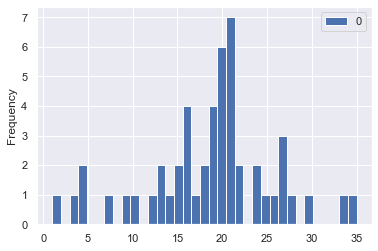

In [12]:
counted_worker_ids_describe.plot.hist(bins=35)

### 1.3 Analysis of Number of Tokens per Query
Next we want to investigate the distribution of the number of tokens per query. The length of queries is an interesting dimension to consider since longer queries tend to be more complex due to the higher amount of information contained in them. As before, we compute the standard statistical measures and provide a histogram as a visualization. Afterwards, we compute the same measures again, however, remove stop words from the queries first. This helps to understand the distribution of the number of keywords (or content words) that are contained in the queries.

In [13]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [14]:
queries = [elem[0] for elem in filtered_batch[["query"]].values.tolist()]
num_tokens = [len(nlp(query)) for query in queries]

Here we can observe in the results that on average the queries consist of 6.1 tokens with a standard deviation of 3.6. In addition, we can observe that there exist queries that contain only 1 (minimum) up to 29 (maximum) tokens. This is more than typical web queries (approximately 2.4 tokens per query) and indicates that the queries are more complex and users provide more detailed information.

In [16]:
num_tokens_describe = pd.DataFrame(num_tokens)
num_tokens_describe.describe()

,0
count,931.000000
mean,6.170784
std,3.692749
min,1.000000
25%,4.000000
50%,5.000000
75%,8.000000
max,29.000000


<AxesSubplot:ylabel='Frequency'>

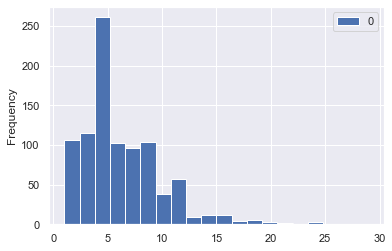

In [17]:
num_tokens_describe.plot.hist(bins=20)

In [18]:
all_stopwords = nlp.Defaults.stop_words

In [19]:
queries = [elem[0] for elem in filtered_batch[["query"]].values.tolist()]
num_tokens_no_stopwords = [len([elem for elem in nlp(query) if not str(elem) in all_stopwords]) for query in queries]

Next we investigate the distribution of the number of tokens per query with stop words removed from the queries. Here we can observe in the results that on average the queries consist of 4.4 tokens with a standard deviation of 2.6. In addition, we can observe that there exist queries that contain up to 25 (maximum) tokens. This is less than before as expected but more than typical web queries (approximately 2.4 tokens per query) and indicates that the queries are more complex and users provide more detailed information.

In [20]:
num_tokens_no_stopwords_describe = pd.DataFrame(num_tokens_no_stopwords)
num_tokens_no_stopwords_describe.describe()

,0
count,931.000000
mean,4.428571
std,2.639241
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,25.000000


<AxesSubplot:ylabel='Frequency'>

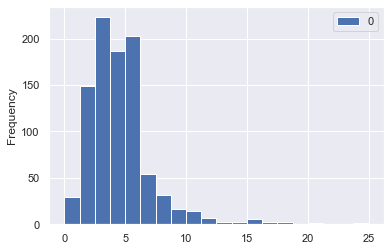

In [21]:
num_tokens_no_stopwords_describe.plot.hist(bins=20)

### 1.4 Analysis of Query Similarity
Next we want to investigate the similarity between queries using the token-based Jaccard similarity measure. A small token-based similarity between the queries indicates higher diversity among the collected NL queries. To this end, we compute the pairwise Jaccard similarities between all pairs of queries and compute summary statistics on the resulting similarities. Afterwards, we compute the measures again, however, remove the stop words in the queries again. Please note that due to the amount of queries, we restrict this calculation only to the 100 queries from our gold standard as a good approximation.

In [22]:
import textdistance

In [23]:
queries = [elem[0] for elem in goldstandard[["query"]].values.tolist()]

In [24]:
similar_queries = []
query_similarities = []
for i in range(0,len(queries)):
    for j in range(i+1,len(queries)):
        tokens_1 = [str(elem) for elem in nlp(queries[i])]
        tokens_2 = [str(elem) for elem in nlp(queries[j])]
        sim = textdistance.jaccard.similarity(tokens_1, tokens_2)
        query_similarities.append(sim)
        if sim >= 0.1:
            similar_queries.append((queries[i], queries[j], sim))

In the following, we can see the results for the pairwise query similarities, indicating that on average the queries have a similarity of 2.7%. However, most of the query similarity comes from the overlapping stop word tokens between the queries (also especially the higher similarities) as we will see subsequently.

In [25]:
query_similarities_describe = pd.DataFrame(query_similarities)
query_similarities_describe.describe()

,0
count,4950.000000
mean,0.027310
std,0.048051
min,0.000000
25%,0.000000
50%,0.000000
75%,0.055556
max,0.333333


In [26]:
all_stopwords = nlp.Defaults.stop_words

In [27]:
similar_queries_no_stopwords = []
query_similarities_no_stopwords = []
for i in range(0,len(queries)):
    for j in range(i+1,len(queries)):
        tokens_1 = [str(elem) for elem in nlp(queries[i]) if not str(elem) in all_stopwords]
        tokens_2 = [str(elem) for elem in nlp(queries[j]) if not str(elem) in all_stopwords]
        sim = textdistance.jaccard.similarity(tokens_1, tokens_2)
        query_similarities_no_stopwords.append(sim)
        if sim >= 0.1:
            similar_queries_no_stopwords.append((queries[i], queries[j], sim))

As mentioned before, here we can see the results of the pairwise Jaccard similarities of the queries, however, the stop words are removed beforehand. Since the mean is drastically reduced, the results indicate that most of the similarity and overlap between the queries comes from the stop words. Hence, the results show that the queries are quite diverse.

In [28]:
query_similarities_no_stopwords_describe = pd.DataFrame(query_similarities_no_stopwords)
query_similarities_no_stopwords_describe.describe()

,0
count,4950.000000
mean,0.007010
std,0.031082
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.333333


# 2. GUI Analysis
In the following, we provide multiple descriptive statistics, visualizations and intersting insights of the collected datasets for GUI retrieval. In particular, this section of the notebook shows statistics for the sampled Rico GUIs and the collected relevance annotations of the GUIs.

### 2.1 Load Datasets

In [29]:
abs_path = '../webapp/gui2rapp/staticfiles/resources/'

app_details = pd.read_csv(abs_path+"app_details.csv")
ui_details = pd.read_csv(abs_path+"ui_details.csv")

abs_path = '../data/gui_ranking/mturk/goldstandard_batch_1/05_relevance_annotations/'

annotations_1 = pd.read_csv(abs_path+"/annotations_1.csv")
annotations_2 = pd.read_csv(abs_path+"/annotations_2.csv")

abs_path = '../data/gui_ranking/mturk/goldstandard_batch_2/05_relevance_annotations/'

annotations_3 = pd.read_csv(abs_path+"/annotations_1.csv")
annotations_4 = pd.read_csv(abs_path+"/annotations_2.csv")

annotations = pd.concat([annotations_1, annotations_2, annotations_3, annotations_4])

### 2.2 Analysis of Annotators
We show the distribution of the number relevance annotations per annotator. Here we consider all annotations from 450 queries, 30 GUIs per query and 3 annotations per GUI (resulting in 40,500 relevance annotations overall) for this computation. In particular, we show standard statistical measures to investigate the distribution of the number of relevance annotations by the annotators. Overall, 49 annotators participated in the relvance annotation.

In [30]:
from collections import Counter
all_annotators = [elem[0] for elem in annotations[['WorkerId']].values.tolist()]
all_annotators_counter = Counter(all_annotators)

In [31]:
len(list(all_annotators_counter.keys()))

49

The results in the following show that on average each of the annotators completed 55.1 annotation HITs on Mechanical Turk. Each of the HITs contained 15 individual relevance annotations. Therefore, each annotator provided 826.5 relevance annotations on average.

In [32]:
all_annotators_counter_describe = pd.DataFrame(list(all_annotators_counter.values()))
all_annotators_counter_describe.describe()

,0
count,49.000000
mean,55.102041
std,105.723154
min,1.000000
25%,2.000000
50%,10.000000
75%,55.000000
max,569.000000


### 2.3 Analysis of the GUIs' App Categories and App Ratings
Next we want to investigate the distribution of the app categories and app ratings of the randomly sampled GUIs from the Rico dataset. Including many app categories and domains provides higher diversity of GUIs and the corresponding queries in our collected datset. Please note that we use the filtered dataset of 931 queries and GUIs. To this end, we compute standard statistical measures and show a box plot that visualizes the GUIs app categories distribution.

In [33]:
def find_app_category(ui_index):
    rslt_df = ui_details.loc[ui_details['UI Number'] == ui_index][['App Package Name']].values.tolist()[0][0]
    rslt_row = app_details.loc[app_details['App Package Name'] == rslt_df]
    return rslt_row[['Category']].values.tolist()[0][0]

def find_app_rating(ui_index):
    rslt_df = ui_details.loc[ui_details['UI Number'] == ui_index][['App Package Name']].values.tolist()[0][0]
    rslt_row = app_details.loc[app_details['App Package Name'] == rslt_df]
    return rslt_row[['Average Rating']].values.tolist()[0][0]

In [34]:
all_sampled_gui_indexes = [elem[0] for elem in filtered_batch[['gui_index']].values.tolist()]

In [35]:
all_categories = [find_app_category(gui_index) for gui_index in all_sampled_gui_indexes]
all_ratings = [find_app_rating(gui_index) for gui_index in all_sampled_gui_indexes]

In [36]:
from collections import Counter

all_categories_counter = Counter(all_categories)

In [37]:
df = pd.DataFrame.from_dict(all_categories_counter, orient='index').reset_index()
df = df.rename(columns={'index':'App Category', 0:'count'})

[Text(0, 0, 'Business'),
 Text(1, 0, 'Shopping'),
 Text(2, 0, 'Lifestyle'),
 Text(3, 0, 'Communication'),
 Text(4, 0, 'Medical'),
 Text(5, 0, 'Events'),
 Text(6, 0, 'Parenting'),
 Text(7, 0, 'Education'),
 Text(8, 0, 'News & Magazines'),
 Text(9, 0, 'Social'),
 Text(10, 0, 'Travel & Local'),
 Text(11, 0, 'Maps & Navigation'),
 Text(12, 0, 'Auto & Vehicles'),
 Text(13, 0, 'Food & Drink'),
 Text(14, 0, 'Health & Fitness'),
 Text(15, 0, 'Music & Audio'),
 Text(16, 0, 'Art & Design'),
 Text(17, 0, 'Books & Reference'),
 Text(18, 0, 'Weather'),
 Text(19, 0, 'Dating'),
 Text(20, 0, 'Comics'),
 Text(21, 0, 'Sports'),
 Text(22, 0, 'Video Players & Editors'),
 Text(23, 0, 'Finance'),
 Text(24, 0, 'Beauty'),
 Text(25, 0, 'House & Home')]

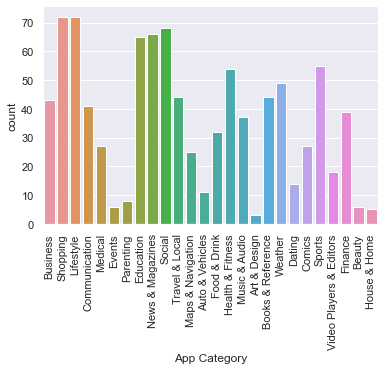

In [38]:
ax = sns.barplot(x="App Category", y="count", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

The above box plot shows that in our random sample from Rico we included GUIs from all 26 app categories that are covered in Rico (only the game and entertainment category was filtered beforehand). We can see that our sample inlcudes a similar high number of GUIs for many categories. However, some categories are overrepresented (e.g. Shopping or Lifestyle apps) while others are underrepresented (e.g Parenting apps). We provide two reasons why random sampling is a good sampling strategy in this case: First, by applying a random sample, we do not introduce any selection bias that may invalidate evaluation results. Second, Rico crawled the apps from the app store providing a distribution of app categories as found on big market places such as Google Play. Naturally more shopping apps will be available compared to parenting apps. Hence, we want to keep this distribution so that also our queries and the resulting gold standard and training datsets reflect this app distribution.

In addition, we can observe that on average the app rating is 4.2 (out of 5) with a standard deviation of 0.34 indicating that in our sample, we included many high rated apps. We assume that also the quality of the GUIs will be higher for higher rated apps.

In [39]:
all_ratings_describe = pd.DataFrame(all_ratings)
all_ratings_describe.describe()

,0
count,931.000000
mean,4.201504
std,0.340553
min,2.800000
25%,4.000000
50%,4.200000
75%,4.400000
max,4.900000


### 2.4 Analysis of GUI Complexity
In the follwing, we investigate the complexity of the GUIs contained in our random sample of 931 GUIs taken from Rico. To this end, we extract the number of all GUI components per GUI screen and compute standard statistical measures.

In [40]:
all_sampled_gui_indexes = [elem[0] for elem in filtered_batch[['gui_index']].values.tolist()]

In [41]:
import json 

def load_json_file(path):
    with open(path, 'r', encoding='utf8') as file:
        return json.load(file)

def flatten_ui_comps_sema(json_sema):
    result = []
    ui_comps_init = json_sema['children']
    while ui_comps_init:
        ui_comp = ui_comps_init.pop()
        if ui_comp.get('children'):
            ui_comps_init.extend(ui_comp.get('children'))
        else:
            result.append(ui_comp)
    return result

def find_ui_comps_for_gui_index(path, gui_index):
    json_data = load_json_file(path + str(gui_index) + '.json')
    results = flatten_ui_comps_sema(json_data)
    return results

In [43]:
abs_path = '../webapp/gui2rapp/staticfiles/resources/semantic_annotations/'

num_of_gui_comps = [len(find_ui_comps_for_gui_index(abs_path, gui_index)) for gui_index in all_sampled_gui_indexes]

In the follwing results, we can observe that on average the GUIs contain 17.5 GUI components with a standard deviation of 13.7. Thus, we included a lot of GUIs with many GUI components up to 104 (maximum) but also included some simpler GUIs with less GUI components.

In [44]:
num_of_gui_comps_describe = pd.DataFrame(num_of_gui_comps)
num_of_gui_comps_describe.describe()

,0
count,931.000000
mean,17.524168
std,13.748752
min,1.000000
25%,7.000000
50%,13.000000
75%,24.000000
max,104.000000


### 2.5 Number of Tokens per GUI
Since each GUI is internally represented as a textual document, we investigate the distribution of the number of tokens contained in the GUIs that we extracted for retrieval. Again, we compute statistical standard measures for this purpose.

In [45]:
all_sampled_gui_indexes = [elem[0] for elem in filtered_batch[['gui_index']].values.tolist()]

In [46]:
abs_path = '../webapp/gui2rapp/staticfiles/resources/preproc_text/dataset_new_stem_F_stpw_T_filter_T.csv'
preproc_text = pd.read_csv(abs_path)
preproc_text['text-all'] = preproc_text['text-all'].apply(literal_eval)

In [47]:
num_gui_tokens = [len(preproc_text[preproc_text['filename'] == (str(gui_index)+'.json')]['text-all'].values.tolist()[0]) for gui_index in all_sampled_gui_indexes]

In the results we can oberserve that on average the GUIs in our sample contain 180.8 tokens.

In [48]:
num_gui_tokens_describe = pd.DataFrame(num_gui_tokens)
num_gui_tokens_describe.describe()

,0
count,931.000000
mean,180.883996
std,200.308411
min,4.000000
25%,56.500000
50%,118.000000
75%,229.500000
max,2464.000000
